# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [5]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [6]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

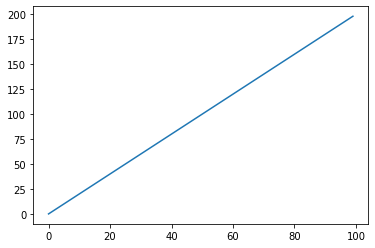

In [11]:
# Method 1
plt.plot(x,y, '-')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

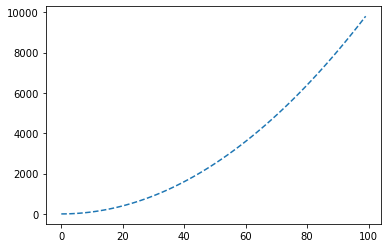

In [10]:
# Method 2
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.plot(x,z, '--')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

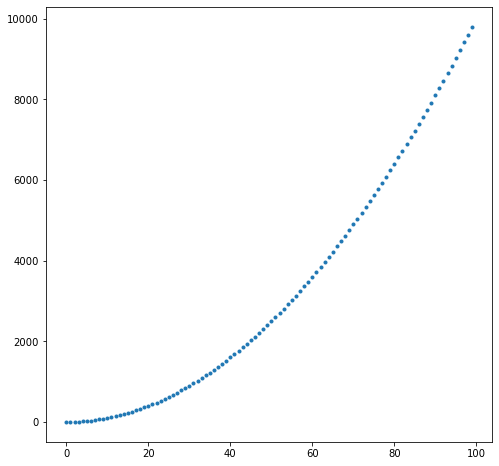

In [9]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (8,8))
ax.plot(x,z, '.')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

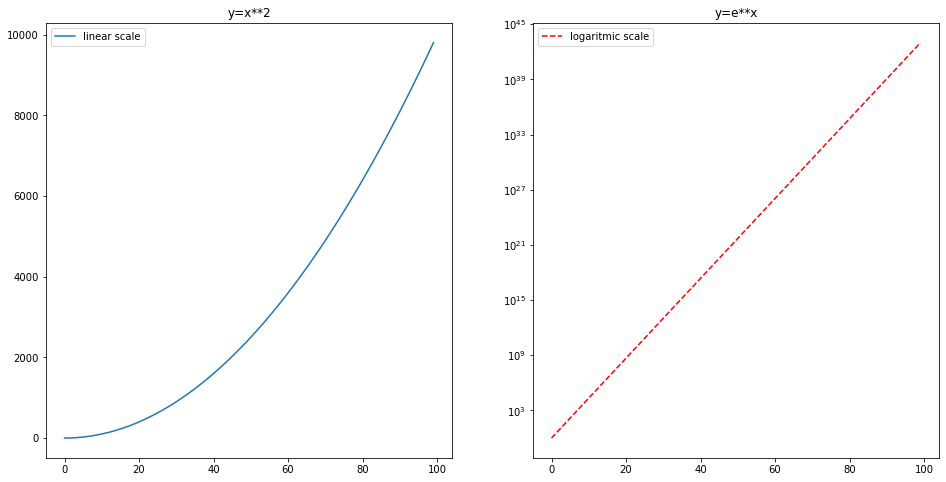

In [12]:
# your code here
fig, axes = plt.subplots(ncols=2, nrows =1, figsize=(16,8))
axes[0].set_title('y=x**2')
axes[0].plot(x**2, label='linear scale')
axes[0].set_yscale('linear')

axes[1].set_title('y=e**x')
axes[1].plot(np.e**x,'--', label='logaritmic scale', color='r')
axes[1].set_yscale('log')

axes[0].legend()
axes[1].legend();

#### As a bonus challenge, try to add a legend to the plot.

In [15]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [19]:
# your code here
import cufflinks as cf
import plotly.express as px
cf.go_offline()

fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

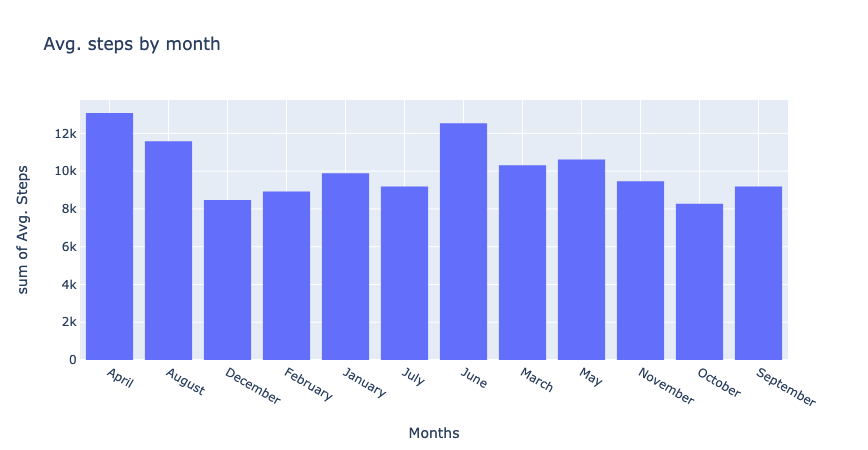

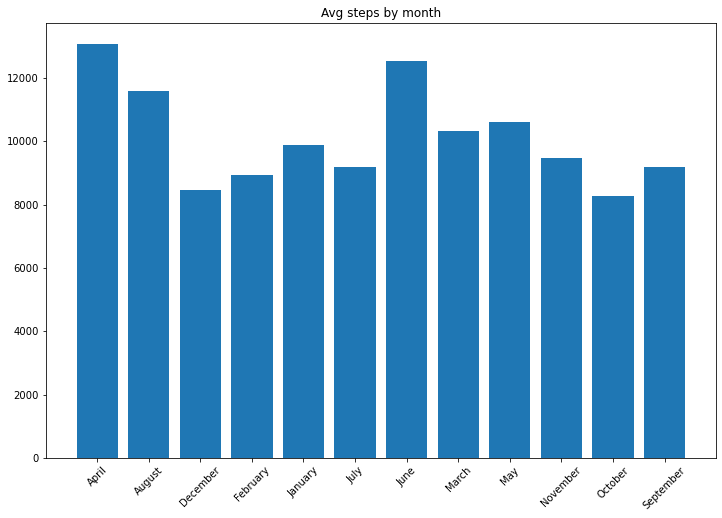

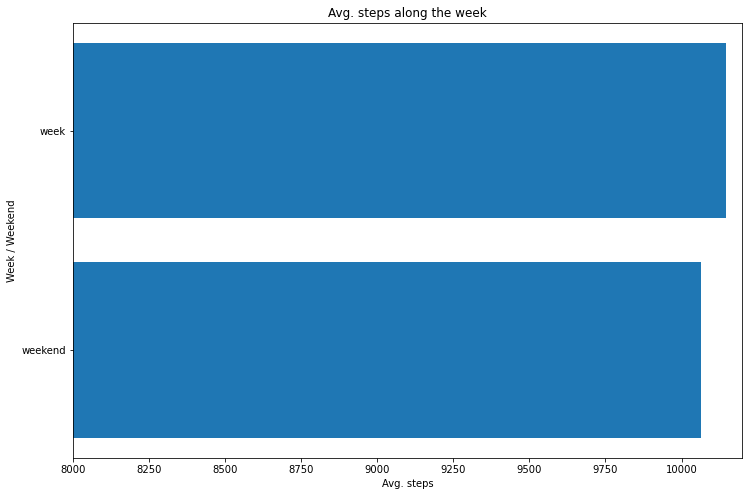

In [24]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
month_steps = fitbit.groupby('Months')['Steps'].agg('mean').reset_index()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (12,8))
x = month_steps['Months']
y = month_steps['Steps']
ax.bar(x,y)
ax.set_title('Avg steps by month')
ax.xaxis.set_tick_params(rotation=45)
fig.savefig('../figures/avg_steps_month.png')

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
week_steps = fitbit.groupby('Work_or_Weekend')['Steps'].agg('mean').reset_index()
week_steps['Work_or_Weekend'].replace({0:'weekend',1:'week'}, inplace=True)
x=week_steps['Work_or_Weekend']
y=week_steps['Steps']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (12,8))
ax.set(ylabel='Week / Weekend', xlabel='Avg. steps', title = 'Avg. steps along the week', xlim = [8000,10200])
ax.barh(x,y)
fig.savefig('../figures/avg_steps_week-weekend.png', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

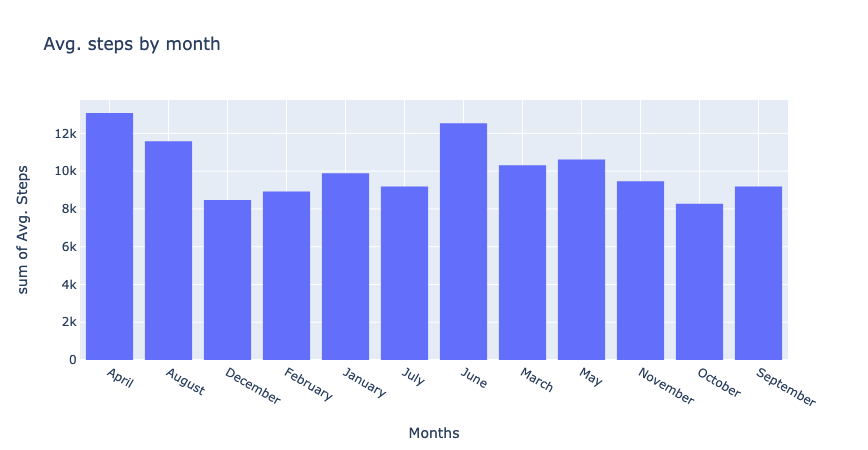

In [26]:
# nicely put!px.histogram(week_steps, x='Work_or_Weekend', y='Steps')
px.histogram(month_steps, x='Months', y='Steps', title='Avg. steps by month', labels={'Steps':'Avg. Steps'})

,Work_or_Weekend,Steps
0,weekend,10064.238095
1,week,10144.572519


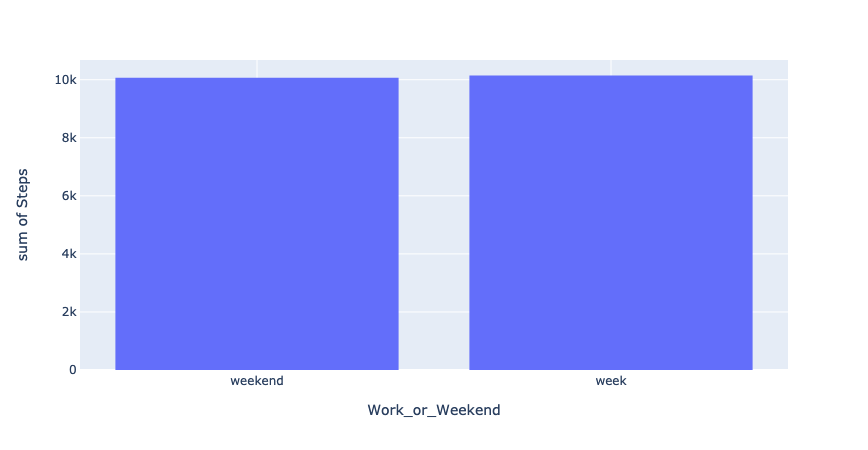

In [31]:
# lets check the week steps
display(week_steps)
px.histogram(week_steps, x='Work_or_Weekend', y='Steps')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

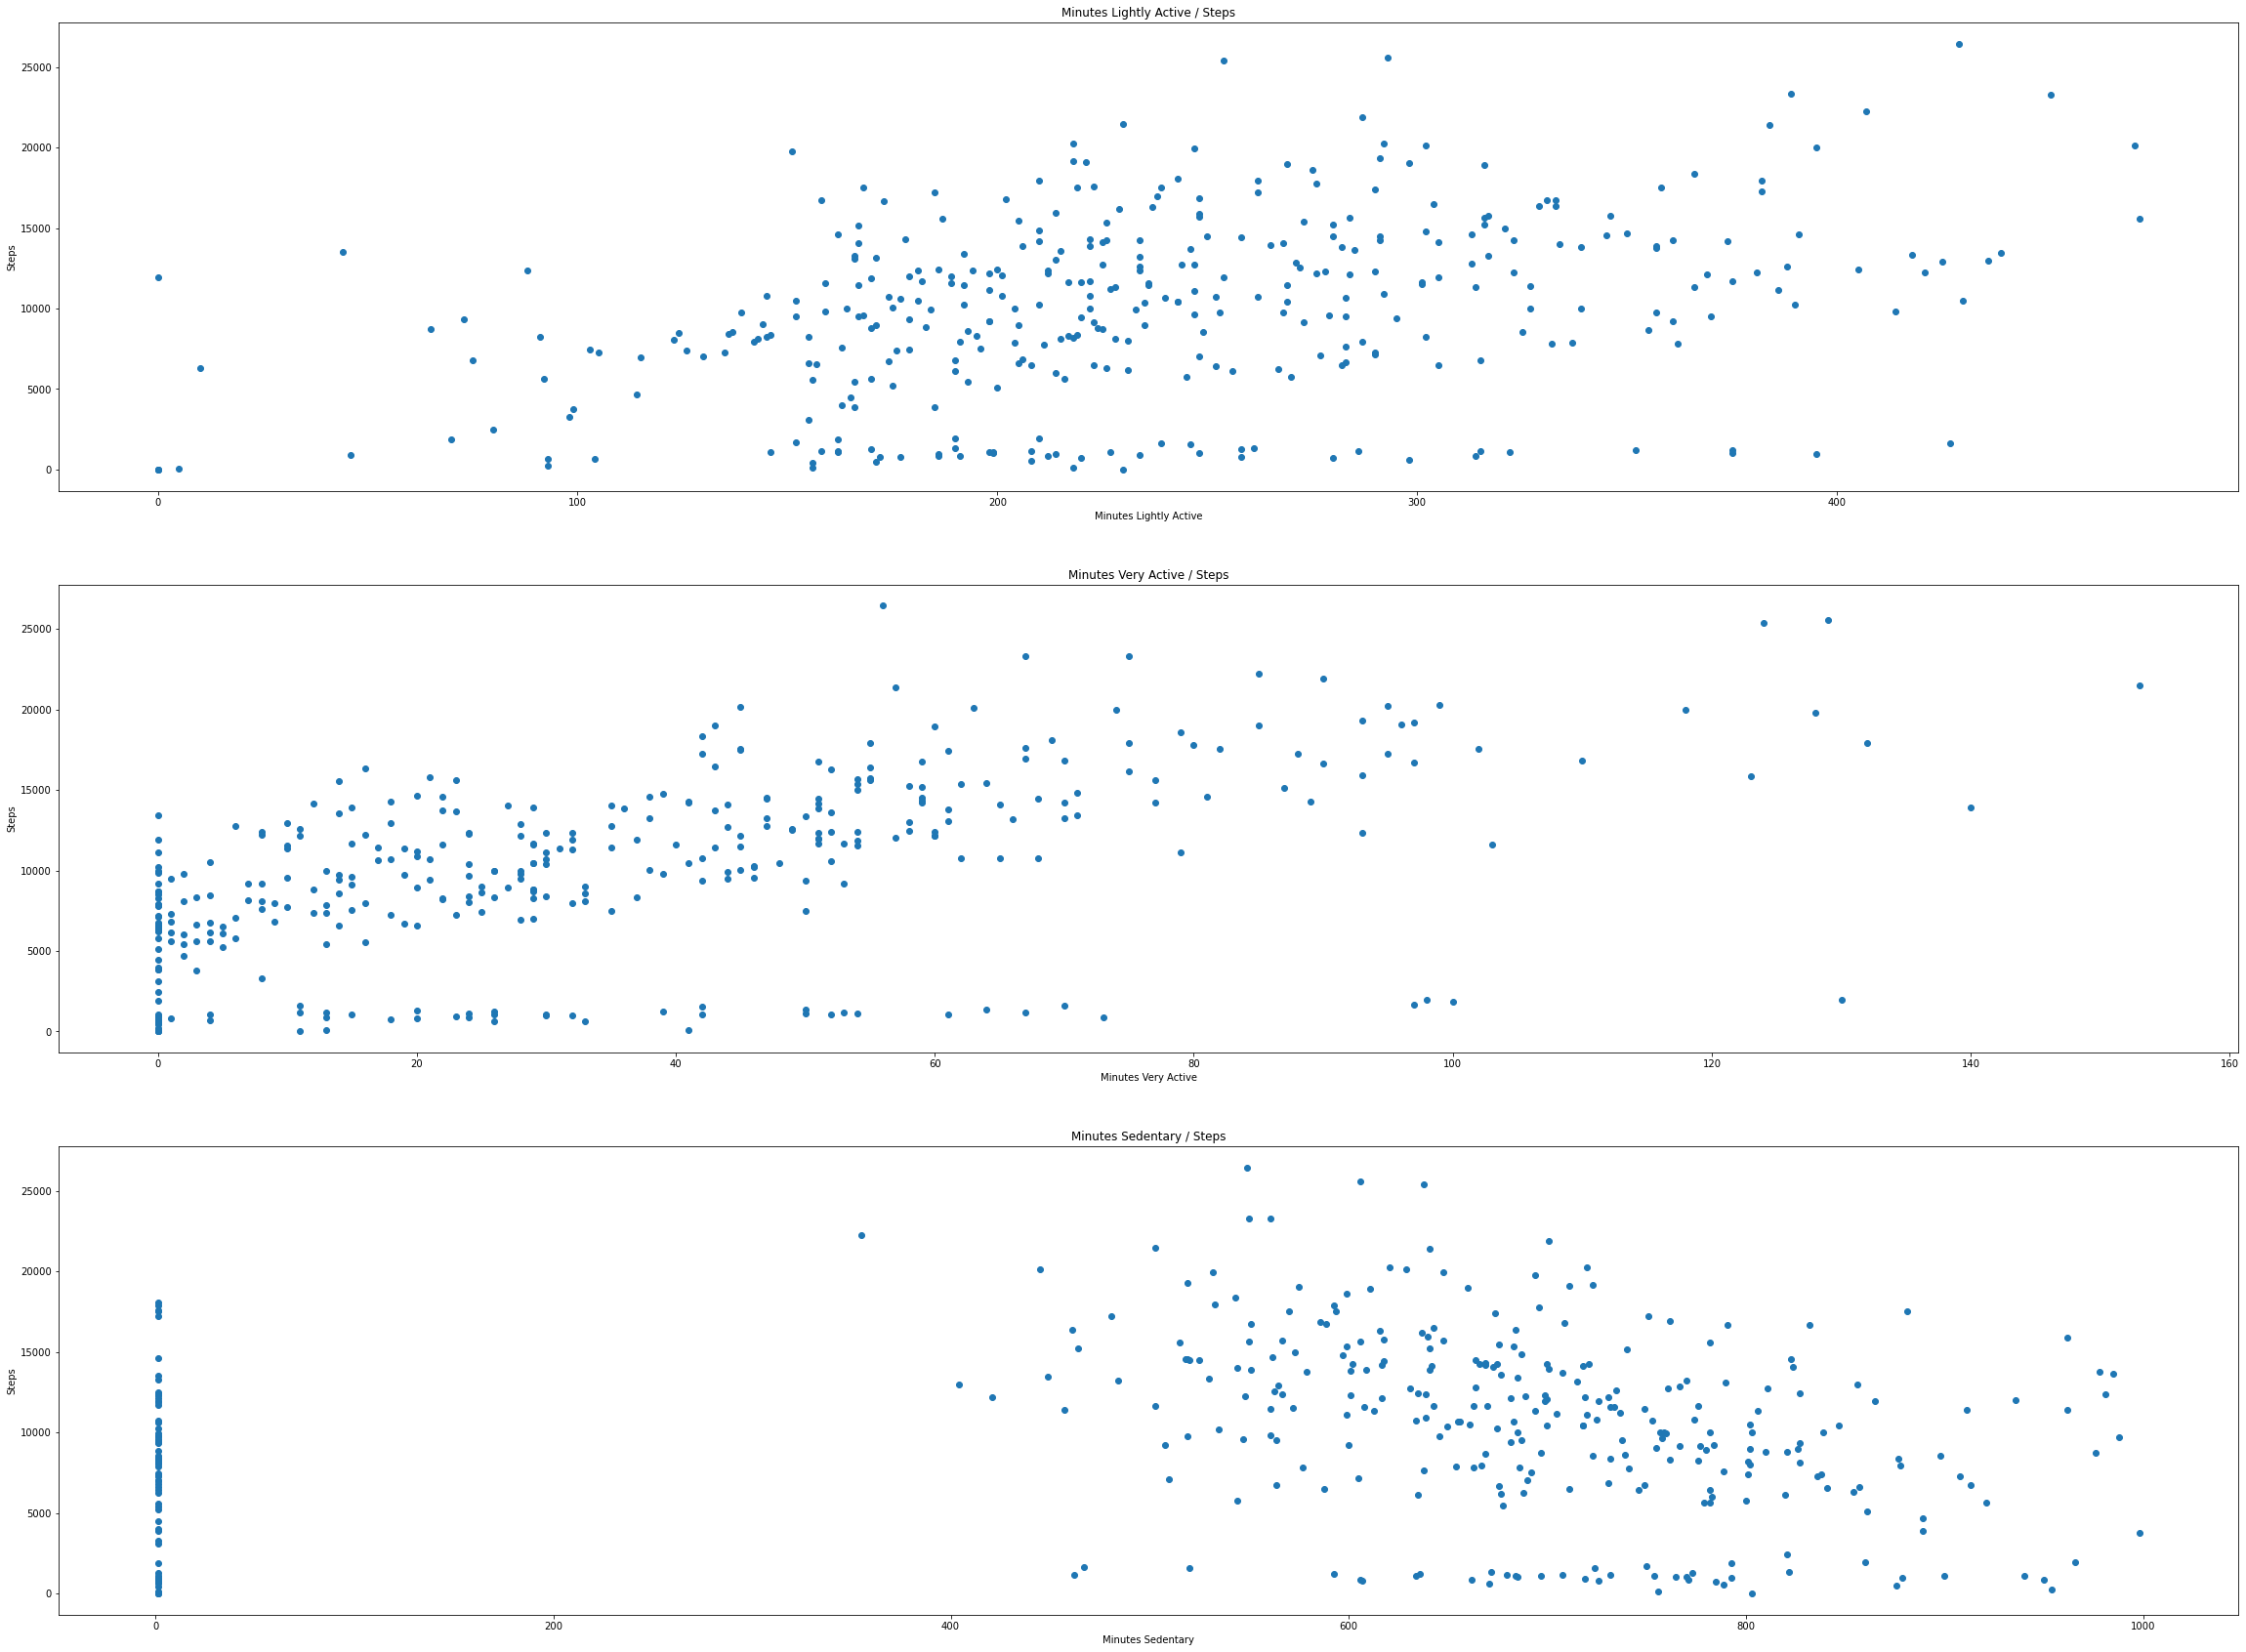

In [43]:
# your code here
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
loops = [i for i in range(len(cols))]

fig, axes = plt.subplots(ncols=1, nrows =3, figsize = (40,30))

# nice looping way 
for x, loop in zip(cols, loops):
    axes[loop].scatter(fitbit[x], fitbit['Steps'])
    axes[loop].set(ylabel='Steps', xlabel=f'{x}', title = f'{x} / Steps', )

fig.savefig('../figures/activity_vs_steps.png', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

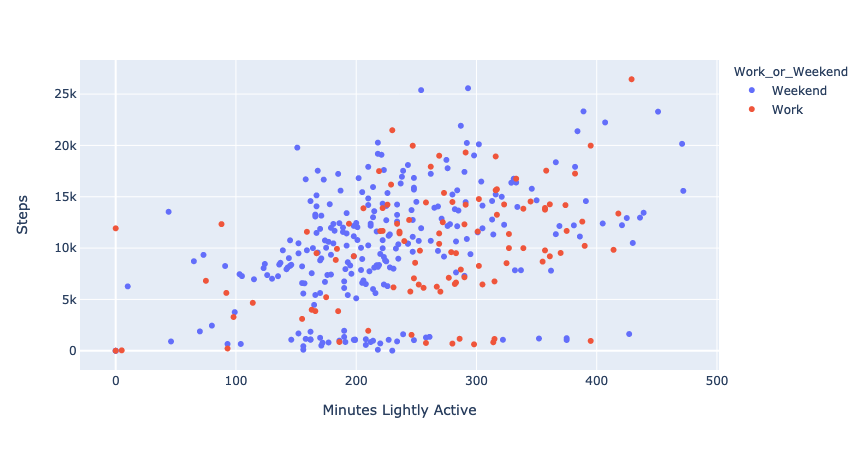

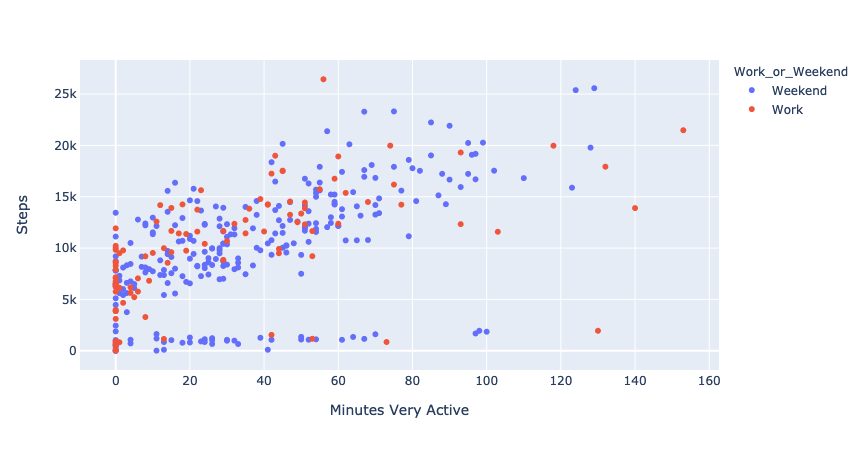

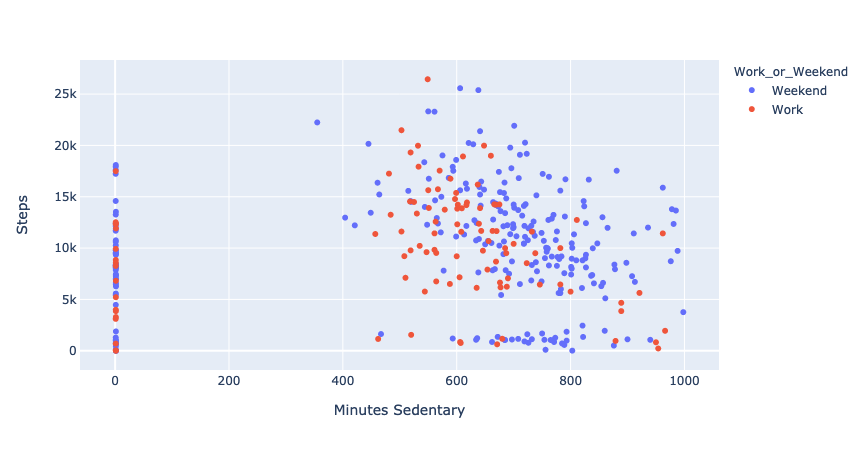

In [44]:
# Lets do it interractive
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fitbit['Work_or_Weekend'].replace({0:'Work', 1:'Weekend'}, inplace=True)
for col in cols:
    fig = px.scatter(fitbit, x=col, y='Steps', color='Work_or_Weekend')
    fig.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [48]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [49]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [51]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
5,6,0.0,3,23.926502,0,0,8.4583
6,7,0.0,1,54.000000,0,0,51.8625
7,8,0.0,3,2.000000,3,1,21.0750
8,9,1.0,3,27.000000,0,2,11.1333
9,10,1.0,2,14.000000,1,0,30.0708


In [50]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
5,"Moran, Mr. James",male,330877,U0,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,U0,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,U0,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,U0,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [81]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

#### Use the right visulalization to show the distribution of column `Age`.

In [83]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


In [86]:
# your code here
age = titanic.groupby('Age').agg('count')
age

,PassengerId,Survived,Pclass,Name,Gender,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.170000,1,0,1,1,1,1,1,1,1,1,1
0.330000,1,0,1,1,1,1,1,1,1,1,1
0.420000,1,1,1,1,1,1,1,1,1,1,1
0.670000,1,1,1,1,1,1,1,1,1,1,1
0.750000,3,2,3,3,3,3,3,3,3,3,3
0.830000,3,2,3,3,3,3,3,3,3,3,3
0.920000,2,1,2,2,2,2,2,2,2,2,2
1.000000,10,7,10,10,10,10,10,10,10,10,10
2.000000,12,10,12,12,12,12,12,12,12,12,12


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

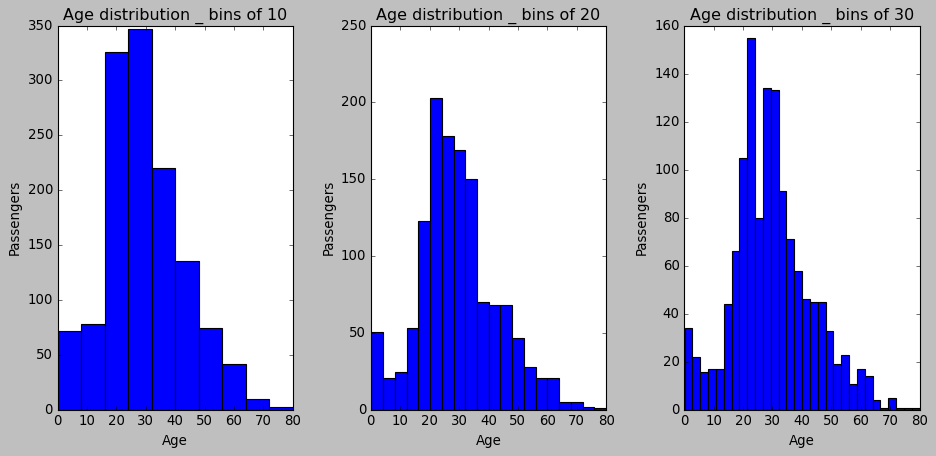

In [95]:
# your code here
b= [10, 20, 30]
loop = range(len(b))
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,6))

for k,j in zip(b, loop):
    ax[j].set(xlabel='Age', ylabel='Passengers', title=f'Age distribution _ bins of {k}')
    ax[j].hist(titanic['Age'],bins=k);
fig.tight_layout(pad=1.5)

#### How does the bin size affect your plot?

In [ ]:
"""
larger bins implies larger age intervals - thus more granularity""

#### Use seaborn to show the distribution of column `Age`.

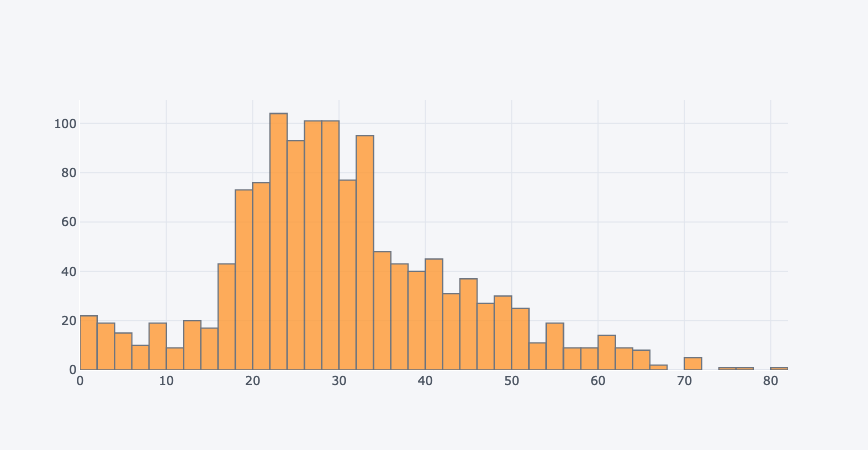

In [89]:
# your code here
titanic['Age'].iplot(kind='histogram')

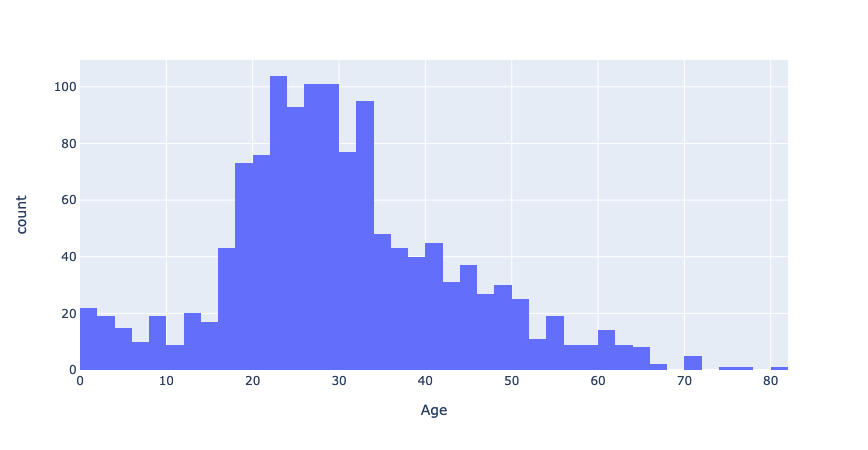

In [91]:
px.histogram(data_frame=titanic, x='Age')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [96]:
gender = titanic.groupby('Gender').size()
gender[0:,]

Gender
female    466
male      843
dtype: int64

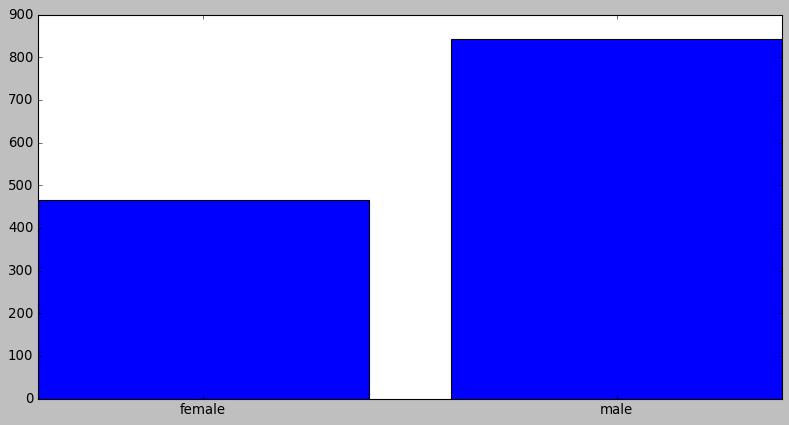

In [97]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.bar(gender.index, gender[0:,]);

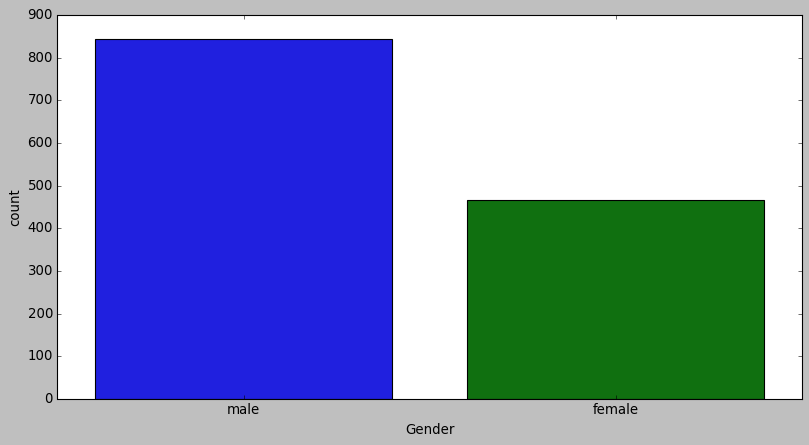

In [98]:
# Method 2 - seaborn
# your code here
sns.countplot(titanic['Gender']);

#### Use the right plot to visualize the column `Pclass`.

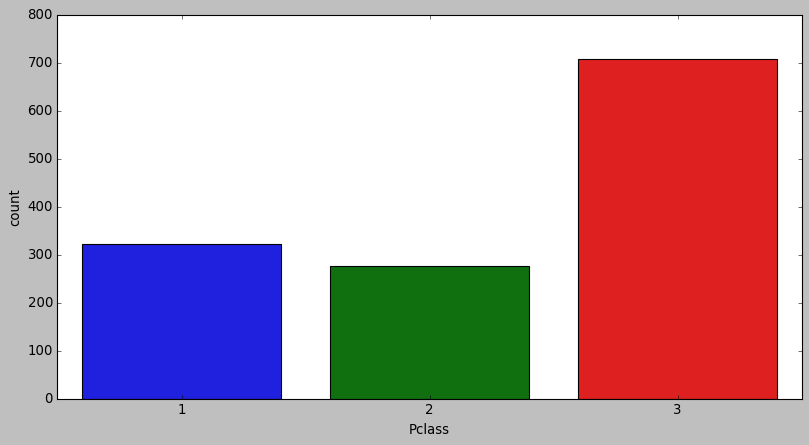

In [99]:
# your code here
sns.countplot(titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [100]:
# your code here
ages = titanic['Age'].describe().reset_index().rename(columns = {'index':'statistic', 'Age': 'value'})
ages.drop(0, inplace=True)
ages

,statistic,value
1,mean,29.879186
2,std,13.448335
3,min,0.170000
4,25%,22.000000
5,50%,28.500000
6,75%,37.000000
7,max,80.000000


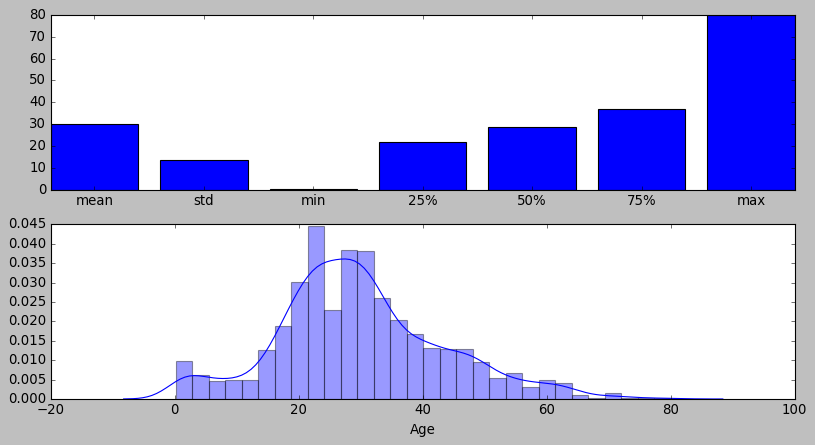

In [102]:
fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].bar(ages['statistic'], ages['value'])
ax[1] = sns.distplot(titanic['Age']);

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

#### What additional information does the last plot provide about feature `Age`?

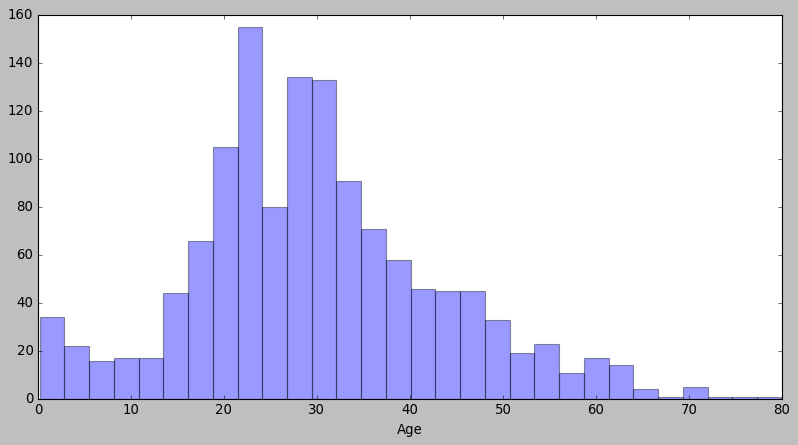

In [103]:
# your code here
sns.distplot(titanic['Age'], kde = False)

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [104]:
titanic[['Age', 'Fare']]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,23.926502,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708


(0.0, 550.0)

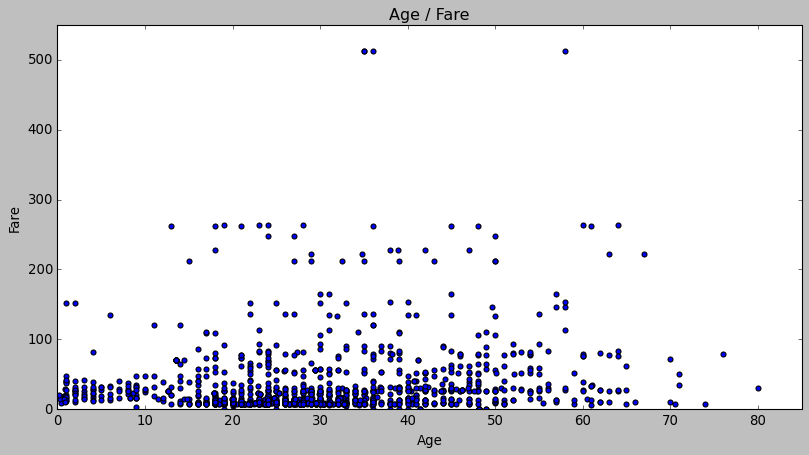

In [105]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots()
ax.scatter(titanic['Age'],titanic['Fare'])
ax.set(xlabel = 'Age', ylabel='Fare', title='Age / Fare')
plt.xlim(0, 85)
plt.ylim(0, 550)

(0.0, 550.0)

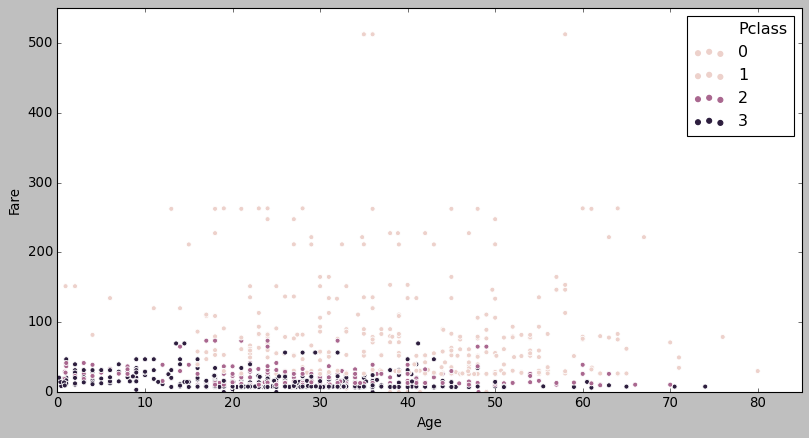

In [107]:
# Method 2 - seaborn
# your code here
gx = sns.scatterplot(titanic['Age'], titanic['Fare'], hue= titanic['Pclass'])
plt.xlim(0, 85)
plt.ylim(0, 550)

#### Plot the correlation matrix using seaborn.

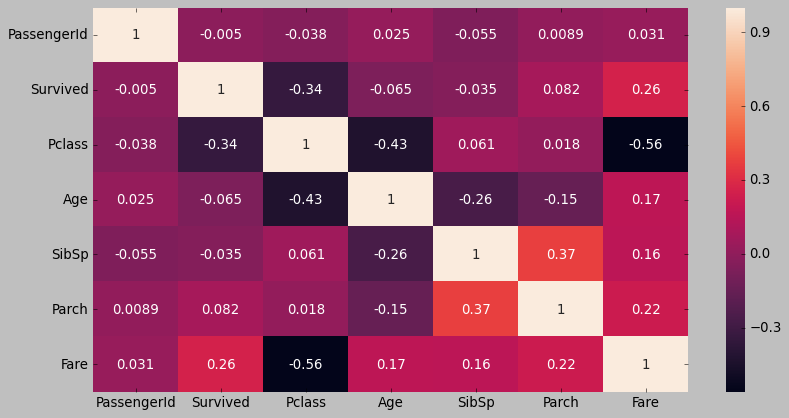

In [109]:
# your code here
sns.heatmap(titanic.corr(), annot=True)

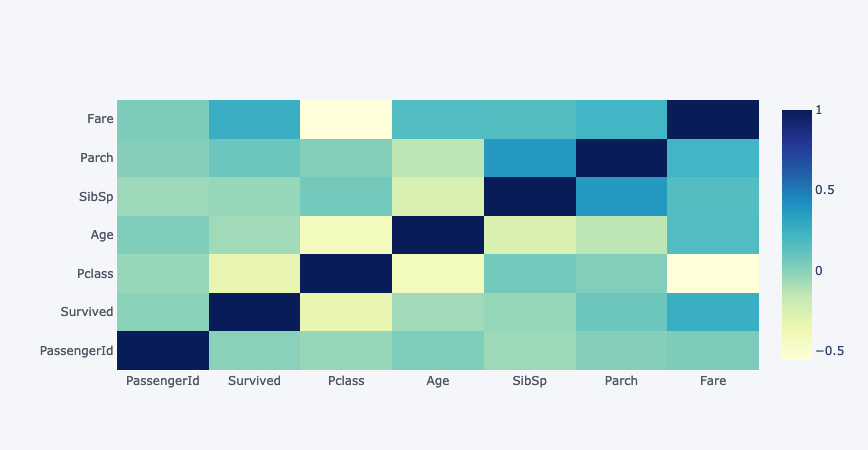

In [110]:
titanic.corr().iplot(kind='heatmap', colorscale='YlGnBu')

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

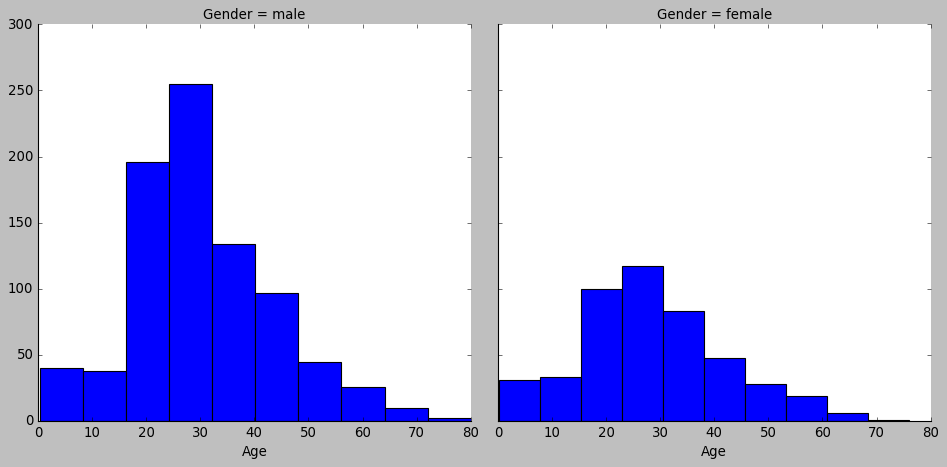

In [112]:


# your code here
cx = sns.FacetGrid(data=titanic, col='Gender', height=6, aspect=1)
cx.map(plt.hist, 'Age');

